## Лабораторная работа № 7

1 пункт неправильно, переделать
6 пункт сигнал другой, переделать


In [208]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
import sympy
import matplotlib
import scipy
from scipy.fftpack import fft #дискретное преобразрвание Фурье
from scipy.fftpack import ifft #обратное преобразрвание Фурье

# 1 
Реализовать усреднение зашумленного сигнала по формуле 1. Результат усреднения представлен
на рис.1. Вывести спектр усредненного и зашумленного сигнала.
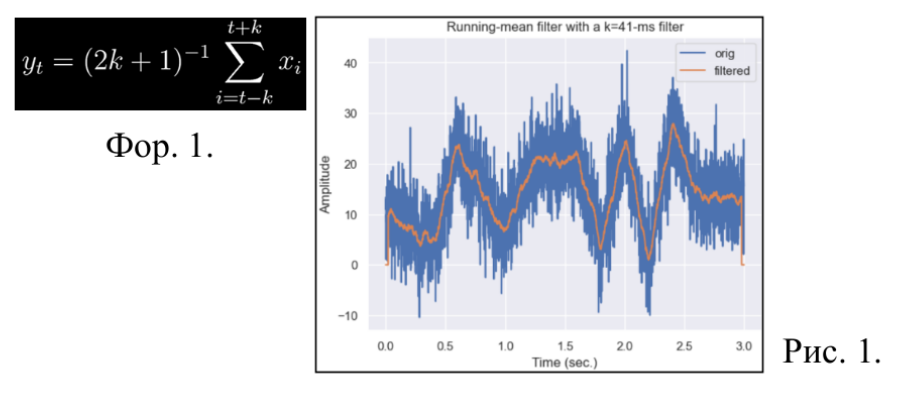

In [209]:
x = np.linspace(-10,10,1000)

def mean(t, k):
    x = np.arange(t-k, t+k+1)
    noise = np.random.normal(-1,1,len(x))
    signal = np.cos(100*x*2.0*np.pi)
    noisy = signal# + noise
    summ = np.sum(noisy)
    return ((2*k+1)**(-1)) * summ


noise = np.random.normal(-1,1,1000)
sig = np.cos(100*x*2.0*np.pi)
y = sig# + noise

In [210]:
k = 2
fn = 100
time = np.linspace(-10,10,1000)

signal = [mean(t, k) for t in time] 

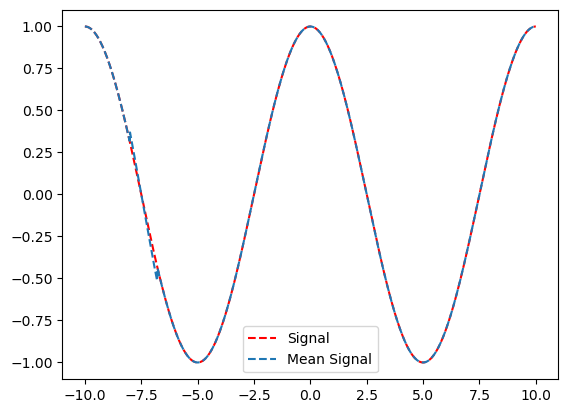

In [211]:
plt.plot(time, y, 'r--' ,label = "Signal")
plt.plot(time, signal,'--', label = "Mean Signal")
plt.legend()
plt.show()

In [212]:
signal_fft = np.fft.fft(signal)
y_fft = np.fft.fft(y)
freq = np.arange(0,10,0.01)

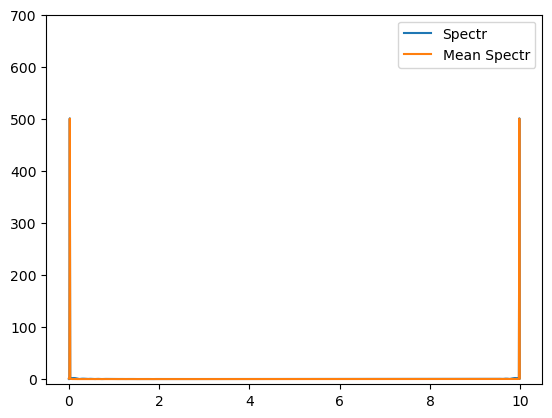

In [213]:
plt.plot(freq, abs(signal_fft), label = "Spectr")
plt.plot(freq, abs(y_fft),label = "Mean Spectr")
plt.legend()
plt.ylim(-10,700)
#plt.xlim(0,10)
plt.show()

# 2
Реализовать усреднение зашумленного сигнала по формуле 2. Результат усреднения представлен
на рис.2. Вывести спектр усредненного и зашумленного сигнала. Сопоставить усреднение по
Гауссу и среднему значению, как это сделано на рис.2. Объяснить результат.
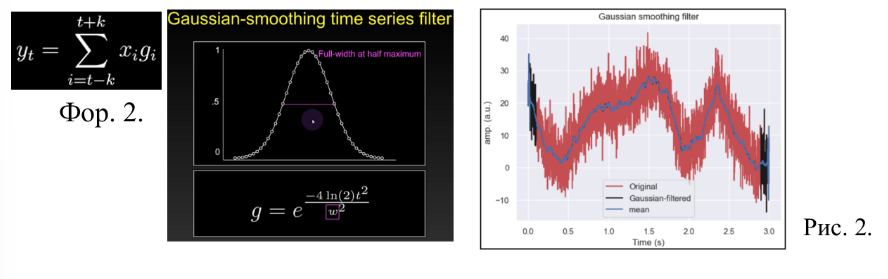

In [214]:
noise = np.random.normal(-1,1,1000)
sig = np.cos(100*x*2.0*np.pi)
signal = sig# + noise
noisy = sig# + noise

fn = 100
time = np.linspace(-10,10,1000)

signal_mean = [mean(t, k) for t in time] 

In [229]:
#w = 26
def gauss(i, w=26):
    return np.exp( ((-4)*np.log(2)*(i**2))/w**2 )

def mean2(t, k):
    x = np.linspace(t-k,t+k,(2*k)+1)
    noise = np.random.normal(-1,1,2*k+1)
    signal = np.cos(100*x*2.0*np.pi)
    noisy = signal# + noise
    conv =  gauss(x) * noisy
    answ = np.sum(conv)
    return answ


k = 0
x = np.linspace(-10,10,1000)
sig_mean1 = [mean(t, k) for t in x] 
sig_mean2 = [mean2(t, k) for t in x]

<bound method Axes.plot of <Axes: >>

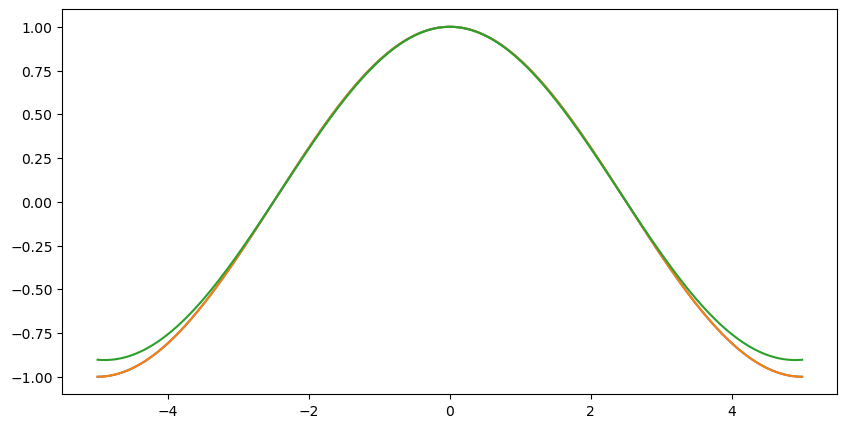

In [230]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x[250:750], noisy[250:750]) 
ax.plot(x[250:750], sig_mean1[250:750])
ax.plot(x[250:750],sig_mean2[250:750])
ax.plot

In [231]:
signal_fft = np.fft.fft(noisy)
y_fft = np.fft.fft(sig_mean1)
y1_fft = np.fft.fft(sig_mean2)

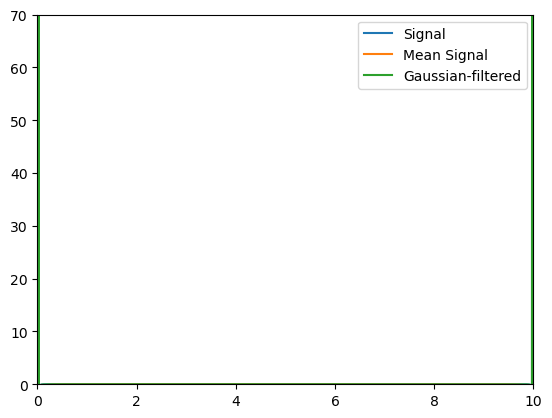

In [232]:
plt.plot(freq,signal_fft, label = 'Signal')   
plt.plot(freq,y1_fft, label = 'Mean Signal')
plt.plot(freq,y_fft, label = 'Gaussian-filtered')   
plt.legend()
plt.ylim(0,70)
plt.xlim(0,10)
plt.show()

# 3
Воспользоваться усреднением по Гауссу для обработки сигнала, состоящего из всплесков пиков.
Всплеск каждого пика является случайно величиной. Амплитуда каждого пика A=1 V, рис.3.
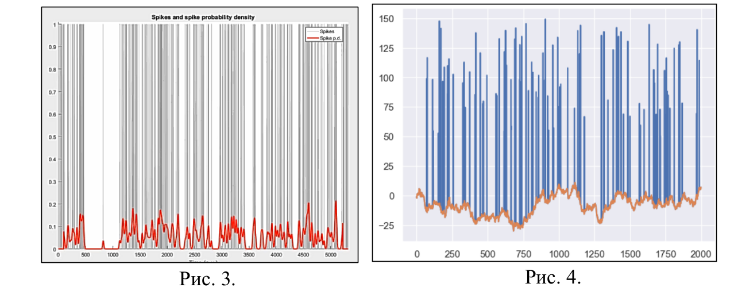

In [167]:
import random
time = np.linspace(-15,15,1000)
def f_cos_v(t):
    r = random.randint(0, 10)
    if r>9:
        return 1 
    else:
        return 0
    
num = 0
def sred2(t, k, sig, p):
    summy = 0
    x = np.linspace(t-k,t+k+1,(k)+1)
    for i in x:
        summy += sig[p]*gauss(i)
    return summy

w= 1
def gauss(i):
    return np.exp(((-4)*math.log(2)* (i**2))/w**2)


In [168]:
signal = [f_cos_v(t) for t in time]
time = np.linspace(-15,15,1000)
signal1 = [gauss(t) for t in time]

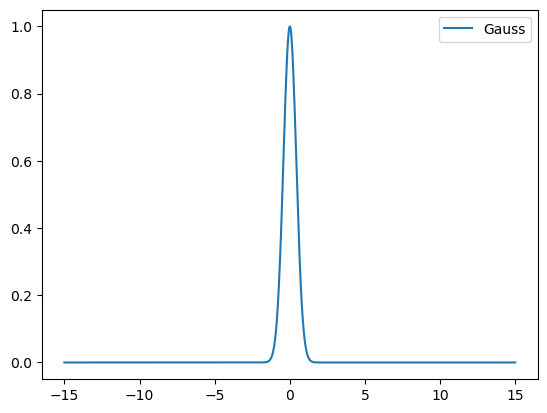

In [169]:
plt.plot(time,signal1, label = "Gauss")
plt.legend()
plt.show()

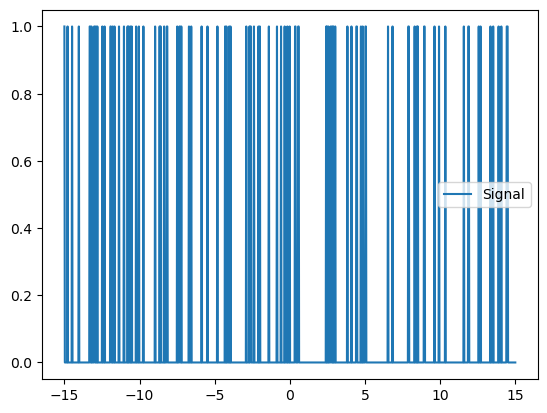

In [170]:
time = np.linspace(-15,15,1000)
plt.plot(time,signal, label = "Signal")
plt.legend()
plt.show()

In [171]:
k=41
time = np.linspace(-10,10,1000)
y=[]
num=0
for t in (time):
    y.append(sred2(t, k, signal, num))
    num=num+1
    
time = np.linspace(-10,10,1000)

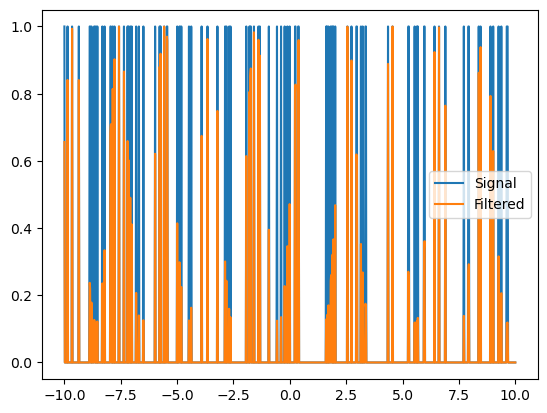

In [172]:
plt.plot(time,signal,  label = "Signal")  
plt.plot(time,y, label = "Filtered")   
plt.legend()
plt.show()

# 4
Реализовать медианный фильтр для очистки сигнала от случайных всплесков в сигнала. В этом
случае амплитуда всплеска сигнала уже не является постоянной и является случайной величиной.
Результат обработки представлен оранжевой линий на рис. 4.

In [173]:
import random
time = np.linspace(-10,10,250)
k=41
def f_cos_v(t):
    r = random.randint(0, 10)
    if r>6:
        return random.random() *(100 + 10) -10, t
    else:
        return random.random() *(10 + 1) -1 , t


def med_fil(t,s1,s2, k, porog):
    i = s2.index(t)
    if s1[i] >=porog:
        s = []
        x = np.linspace(t-k,t+k,(k))
        for i in x:
            s.append(f_cos_v(t)[0])
            
        s.sort()
        for i in range(k):
            if s[i]<porog:
                return s[i]
            
    else:
        return s1[i]
        
        
def sred2(t, k):
    summy = 0
    x = np.linspace(t-k,t+k,(k))
    for i in x:
        summy += f_cos_v(i)*gauss(i)
    return summy
   

In [174]:
signal = [f_cos_v(t) for t in time]
s =[]
s1 =[]

for i in range(len(signal)):
    s.append(signal[i][0])
    
for i in range(len(signal)):
    s1.append(signal[i][1])

In [175]:
med = [med_fil(t, s, s1, k, 10) for t in time] #pieces of time, signal, time(-10,10),koeff? ,porog

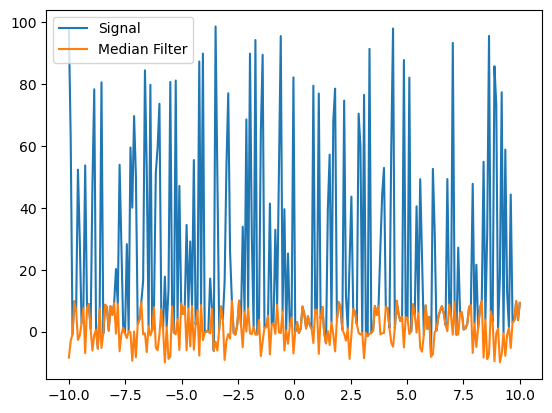

In [176]:
plt.plot(time,s, label = "Signal")  
plt.plot(time,med, label = "Median Filter")
plt.legend(loc = "upper left")
plt.show()

# 5 Метод спектральной интерполяции сигналов.
Метод спектральной интерполяции сигналов.
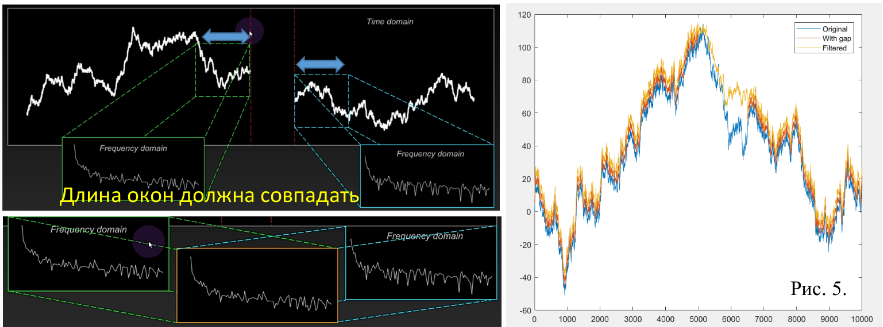

- определить сигнал в заданном временном промежутке, например от 0 до 10 сек.

In [177]:
fn = 100
def f_cos_noise(t, fn): # зашумленный косинус 
    return np.cos(fn*t*2.0*np.pi) +np.random.normal(-1,1) , t

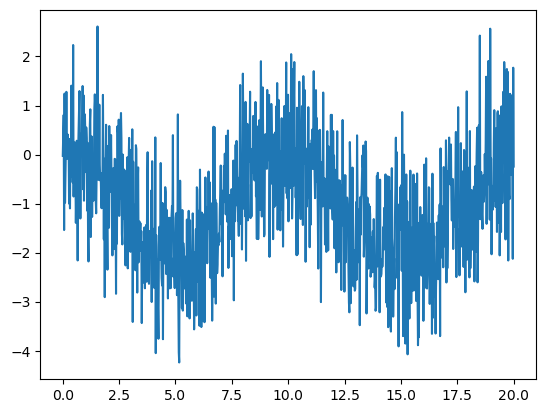

In [178]:
time = np.linspace(-10,10,1000)
signal1 = [f_cos_noise(t, fn) for t in time]
s1 = []
s2 =[]
for i in range(len(signal1)):
    s1.append(signal1[i][0])
    
for i in range(len(signal1)):
    s2.append(signal1[i][1])
    
plt.plot(time+10,s1)   
plt.show()

In [179]:
x1 = 0
x2 = 10

In [180]:
time = []
pro =[]
x = np.linspace(x1,x2,1000)
for i in x:
    k = s2.index(min(s2, key=lambda x: abs(x-i)))
    pro.append(s1[k])
    time.append(s2[k])

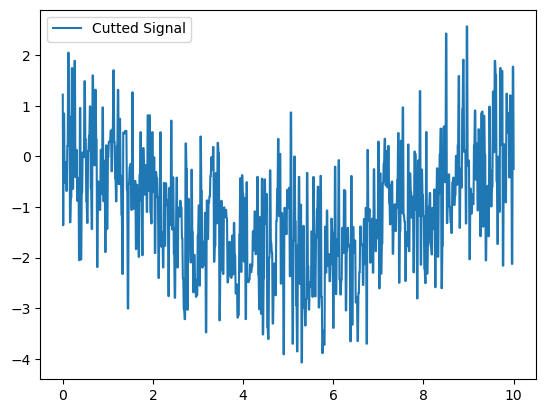

In [181]:
plt.plot(x,pro, label = "Cutted Signal")    #обрезанный сигнал 
plt.legend()
plt.show()

- удалить из сигнала данные в диапазоне от 5 до 7 секунд.

In [182]:
pro_save = pro.copy()

In [183]:
x1 = 0 # секунды для удаления данных
x2 = 3

In [184]:
x0 = np.linspace(x1,x2,1000)
delta = x[1]-x[0]
i = x1
num = 0
while i <= x2:
    pro[num]=0
    num=num+1
    i = i+delta
    

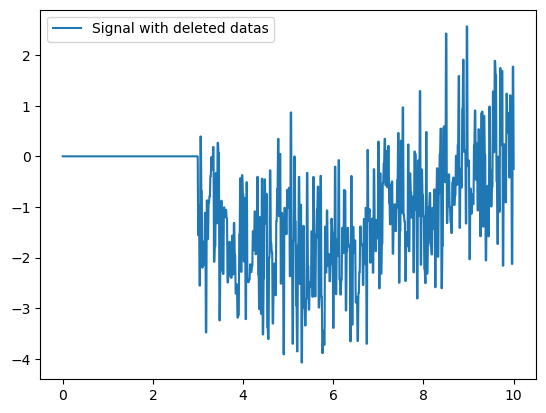

In [185]:
plt.plot(x,pro, label = "Signal with deleted datas")   # сигнал с удаленными данными 
plt.legend()
plt.show()

- задать размер окна по временной области для которых будет определяться спектр. Размер окон
для правой и левой части должны совпадать.

In [186]:
x1 = 0   # размер окон по временной области в которых будет определяться спектры 
x2 = 3

- определить спектр сигнала до разрыва и после разрыва.

In [187]:
pro_f = []
time1 = []
x0 = np.linspace(x1,x2,1000)
delta = x[1]-x[0]
i = x1
num = 0
while i <= x2:
    pro_f.append(pro_save[num])
    num=num+1
    i = i+delta
    
time1 = list(x)

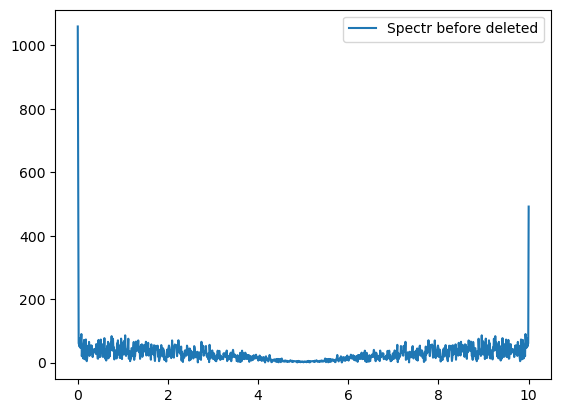

In [188]:
x0 = np.linspace(x1,x2,len(pro_f))   #спектр без удаления части сигнала
plt.plot(x,abs(np.fft.fft(pro_save)), label = "Spectr before deleted") 
plt.legend()
plt.show()

In [189]:
pro_f1 = []
time2= []
x0 = np.linspace(x1,x2,1000)
delta = x[1]-x[0]
i = x1
num = 0
while i <= x2:
    pro_f1.append(pro[num])
    num=num+1
    i = i+delta
time2 = list(x)

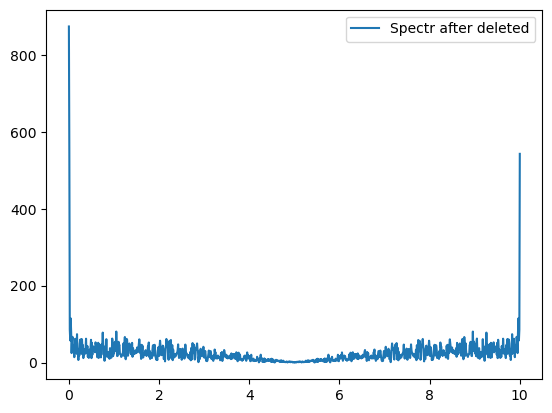

In [190]:
x0 = np.linspace(x1,x2,len(pro_f1)) #спектр с удалением части сигнала 
plt.plot(x,abs(np.fft.fft(pro)), label = "Spectr after deleted")   
plt.legend()
plt.show()

- осуществить усреднение спектров сигналов в правой и левой области.

In [191]:
y_1 = (np.fft.fft(pro))
y_2 = (np.fft.fft(pro_save))
y_s1 = []

In [192]:
for i in range (len(y_1)):
    y_s1.append((y_1[i]+y_2[i])/2) 

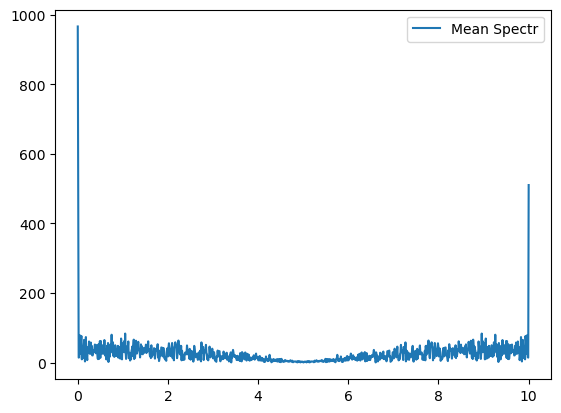

In [193]:
x0 = np.linspace(x1,x2,len(y_s1))
plt.plot(x,np.abs(y_s1), label = "Mean Spectr") 
#среднее м/у удалённым спектром и неудалённым
plt.legend()
plt.show()

- с помощью обратного преобразования Фурье восстановить утерянную часть сигнала.

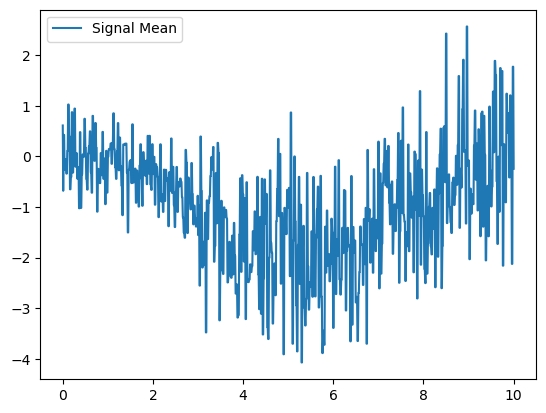

In [194]:
x0 = np.linspace(x1,x2,len(y_s1))
plt.plot(x,np.fft.ifft(y_s1), label = "Signal Mean")   
plt.legend()
plt.show()

In [195]:
x2 = 10
s = []
x1 = 0
x = np.linspace(-10,10,1000)
x0 = np.linspace(0,10,1000)
delta = x[1]-x[0]
i = x1
num = 0
summ = np.fft.ifft(y_s1)
while i <= x2:
    s.append(s1[num])
    num=num+1
    i = i+delta
    
i = x2
num = 0
delta = x0[1]-x0[0]
while i <= 20:
    s.append(summ[num])
    num=num+1
    i = i+delta
    
x = np.linspace(-10,10, len(s))


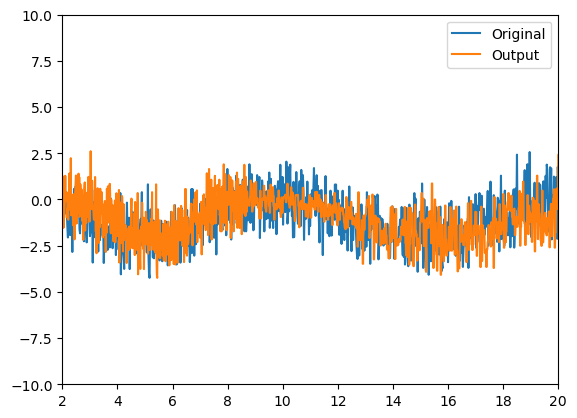

In [196]:
x = np.linspace(-10,10,1000)  
plt.plot(x+10,s1, label = "Original")

x = np.linspace(-10,10, len(s))
plt.plot(x+12,s, label = "Output")
plt.legend()
plt.ylim(-10,10)
plt.xlim(2,20)
plt.show()

# 6 Алгоритм понижения/повышения дискретности сигнала в N раз.

уменьшением дискретности сигнала в N раз с помощью определения новой частоты Найквиста, которая будет соответствовать новой дискретности сигнала.

Понижение дискретности сигнала осуществляется в три этапа, можно выбрать сигнал косинуса с двумя частотами, например, 50 и 100 Гц.

In [197]:
def draw(x, y, size=(10,5)):
    fig, ax = plt.subplots(figsize=size)
    ax.plot(x, y)
    ax.plot

In [198]:
fn1 = 50
fn2 = 100

In [199]:
def f_cos(t, fn):
    return np.cos(fn*t*2.0*np.pi)       #x(t)

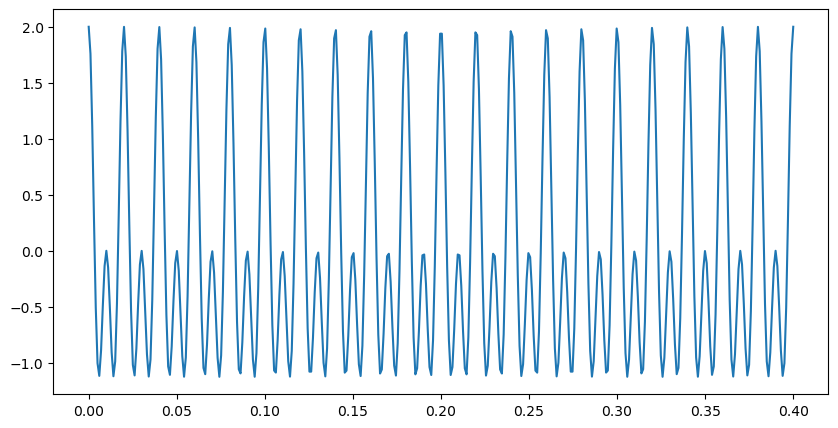

In [200]:
fmax = 1000
N = 400

x0 = np.linspace(0.0,N*1/fmax,N)

sig1 = np.cos(2*np.pi*50*x0)
sig2 = np.cos(2*np.pi*100*x0)
s = sig1 + sig2
draw(x0, s)

In [201]:
fmax = 1000
N=600

x=np.linspace(0.0,N*1/fmax,N)
x12 = np.fft.fftshift(np.fft.fftfreq(x.shape[-1], x[1]-x[0]))

xf = np.linspace(0.0,fmax/2,N//2)
x=np.linspace(0.0,N*1/fmax,N)

fun1 = np.cos(fn1*x*2.0*np.pi) 
fun2 = np.cos(fn2*x*2.0*np.pi) 
y_fft1 = fft(fun1+fun2)

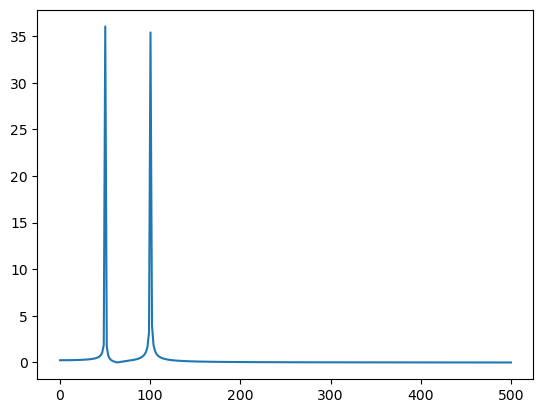

In [202]:
plt.plot(xf, 2.0*N*np.abs(y_fft1[:N//2])/10000)
plt.show()

фильтр нижних частот на новой частоте найквиста 

In [371]:
tw = math.sqrt(2)
comp = np.complex(1j)

sample_rate = 1000
chast = 250
xf1 = np.linspace(0.0,chast/2,N//2)

C:\Users\79132\AppData\Local\Temp\ipykernel_19364\2404540644.py:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  comp = np.complex(1j)


In [372]:
filtr_low = chast**2/(-(xf**2) +comp*tw*chast*xf+chast**2) #частотный коэфициент передачи 
sig_filtered =(filtr_low* 2*N*np.abs(y_fft1[0:N//2]))

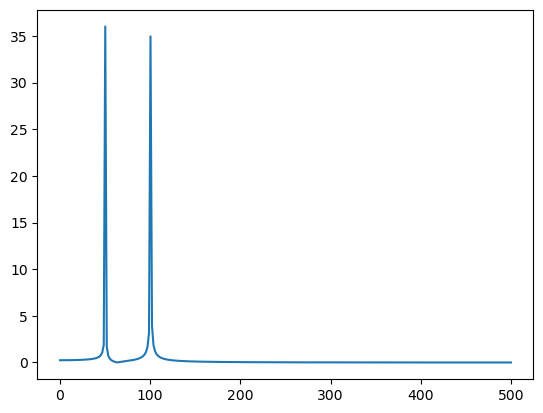

In [373]:
plt.plot(xf,np.abs(sig_filtered)/10000)
plt.show()

In [374]:
prt = ifft(sig_filtered[::3])/N

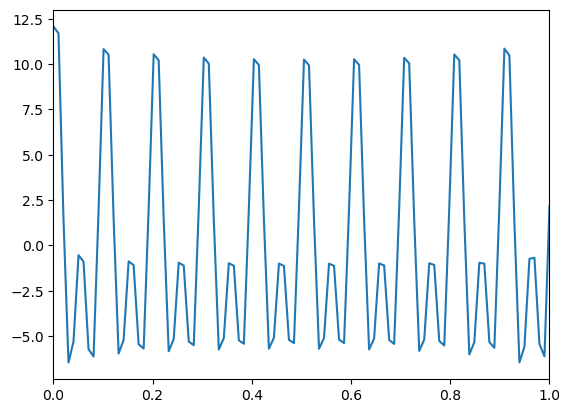

In [375]:
x1 = np.linspace(-100,100,len(prt))
plt.plot((x1+100)/200,prt) 
plt.xlim(0,1)
plt.show()

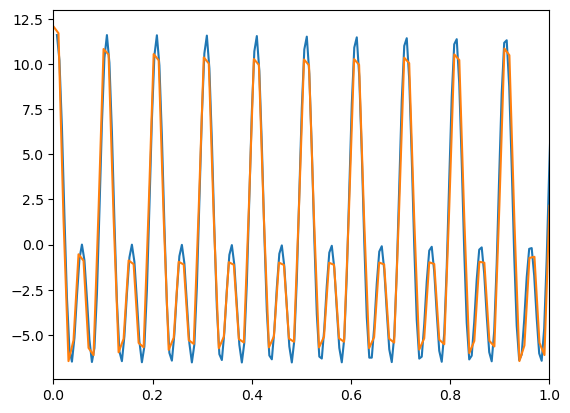

In [391]:
x1 = np.linspace(-100,100,len(prt))
plt.plot((x0*5.025)+0.007,(s*5.8))
plt.plot((x1+100)/200,prt) 
plt.xlim(0,1)
plt.show()

# 7 
В результате записи сигналов с 3-х различных датчиков были записаны данные с различной частотой
дискретизации. Привести все сигналы к единой частоте дискретизации. В качестве сигналов можно выбрать три косинуса с различной частотой дискретизации,
например 10, 35 и 80 Гц.

In [143]:
fn1 = 10
fn2 = 35
fn3 = 80

In [144]:
def f_cos(t, fn):
    return np.cos(fn*t*2.0*np.pi)       #x(t)

In [145]:
x1 = np.linspace(0,1,10)
x2 = np.linspace(0,1,50)
x3 = np.linspace(0,1,75)

signal1 = [f_cos(t, fn1) for t in x1]
signal2 = [f_cos(t, fn2) for t in x2]
signal3 = [f_cos(t, fn3) for t in x3]

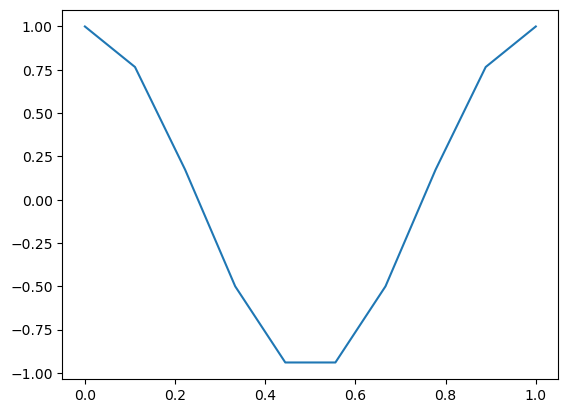

In [146]:
s = map(sum, zip(signal1,signal2, signal3))
s = list(s)

plt.plot(x1,signal1)
plt.show()

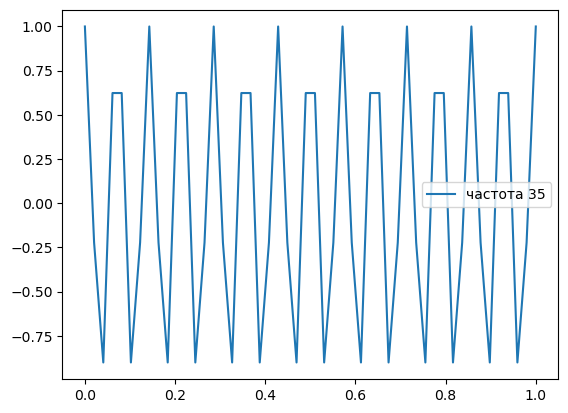

In [147]:
plt.plot(x2,signal2, label = 'частота 35')
plt.legend()
plt.show()

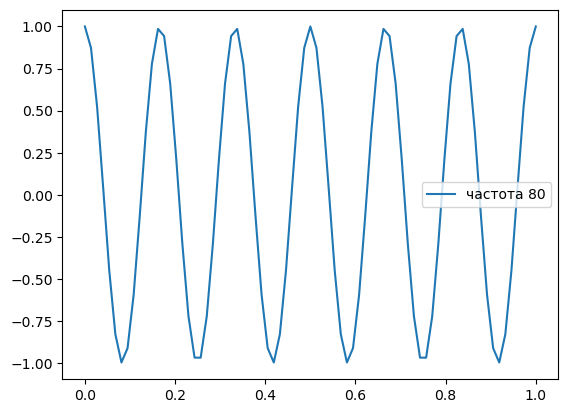

In [148]:
plt.plot(x3,signal3, label = 'частота 80')
plt.legend()
plt.show()

In [149]:
fmax = 1000
N=600

x=np.linspace(0.0,N*1/fmax,N)
x12 = np.fft.fftshift(np.fft.fftfreq(x.shape[-1], x[1]-x[0]))

xf = np.linspace(0.0,fmax/2,N//2)
x=np.linspace(0.0,N*1/fmax,N)



fun1 = np.cos(fn1*x*2.0*np.pi) 
fun2 = np.cos(fn2*x*2.0*np.pi) 
fun3 = np.cos(fn3*x*2.0*np.pi) 
y_fft1 = np.fft.fft(fun1)
y_fft2 = np.fft.fft(fun2)
y_fft3 = np.fft.fft(fun3)

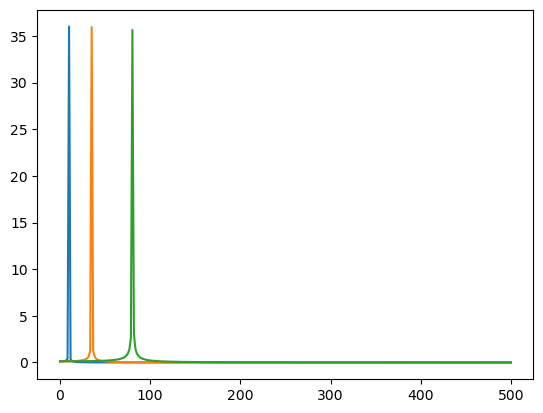

In [150]:
plt.plot(xf, 2.0*N*np.abs(y_fft1[0:N//2]/10000))
plt.plot(xf, 2.0*N*np.abs(y_fft2[0:N//2]/10000))
plt.plot(xf, 2.0*N*np.abs(y_fft3[0:N//2]/10000))
plt.show()

In [151]:
tw = math.sqrt(2)
comp = np.complex(1j)

sample_rate = 1000
chast = 100
xf1 = np.linspace(0.0,chast/2,N//2)

C:\Users\79132\AppData\Local\Temp\ipykernel_19364\314242856.py:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  comp = np.complex(1j)


In [152]:
filtr_low = (chast**2/(-(xf**2) +comp*tw*chast*xf+chast**2)) #частотный коэфициент передачи 
sig_filtered1 =(filtr_low* 2*N*np.abs(y_fft1[0:N//2]))
sig_filtered2 =(filtr_low* 2*N*np.abs(y_fft2[0:N//2]))
sig_filtered3 =(filtr_low* 2*N*np.abs(y_fft3[0:N//2]))

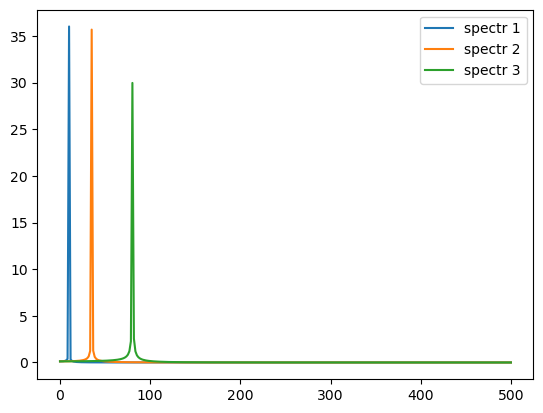

In [153]:
plt.plot(xf,np.abs(sig_filtered1)/10000, label = 'spectr 1')
plt.plot(xf,np.abs(sig_filtered2)/10000, label = 'spectr 2')
plt.plot(xf,np.abs(sig_filtered3)/10000, label = 'spectr 3')
plt.legend()
plt.show()

In [154]:
prt1 = ifft(sig_filtered1[::3])/N
prt2 = ifft(sig_filtered2[::3])/N
prt3 = ifft(sig_filtered3[::3])/N

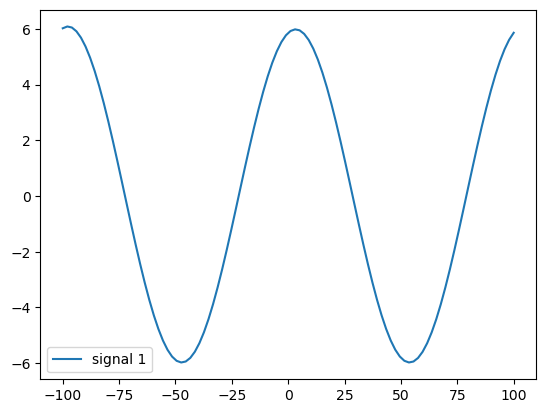

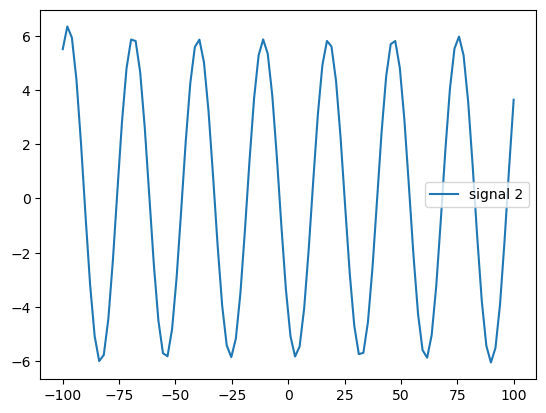

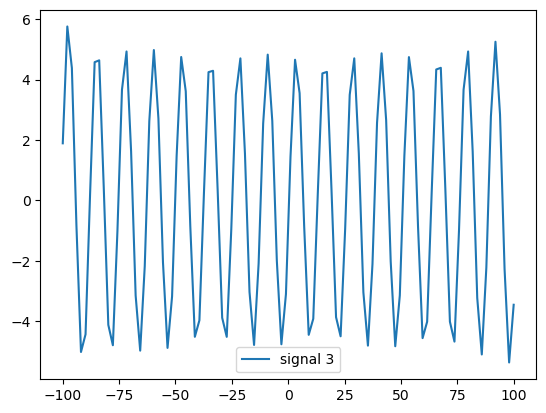

In [155]:
x1 = np.linspace(-100,100,len(prt))
plt.plot(x1,prt1, label = 'signal 1')
plt.legend()
plt.show()
plt.plot(x1,prt2, label = 'signal 2')
plt.legend()
plt.show()
plt.plot(x1,prt3, label = 'signal 3')
plt.legend()
plt.show()